# Investigation of IPR in the Floquet Dynamics of Many Body Systems

We're trying to look at localization/freezing in rapidly driven time-periodic systems. Specifically, we want to check whether freezing exists in long raange spin systems in the manner seen for short range systems. We start by defining the *Inverse Participation Ratio* (IPR) for a wavefunction $\psi(x)$ as 
\begin{equation*}
\phi_{IPR}\equiv \int dx\;\vert\psi(x)\vert^4
\end{equation*}

More generally, the IPR of a state $|\phi\rangle$ in a representation given by complete orthonormal basis $|m\rangle$ is $\phi_{IPR} = \sum_m\vert\langle m \vert\phi\rangle\vert^4$.

In the context of localization, the IPR is useful. The smallest value of the IPR corresponds to a fully delocalized state, $\psi(x)=1/\sqrt{N}$ for a system of size $N$, where the IPR yields $\sum_x |\psi(x)|^4=N/(N^{1/2})^4=1/N$. Values of the IPR close to 1 correspond to localized states. For a periodically driven system, we look at the IPR of the Floquet modes at $t=T$, where $t=2\pi/\omega$ for drive frequency $\omega$.

## Transverse-Field Ising model.
First, consider the well-known Hamiltonian of the driven Transverse Field Ising model of $N$ spins:
\begin{align*}
 H(t) &= H_0 + \left(h_0 + h\cos{\omega t}\right) H_1\\
H_0 &= -\frac{1}{2}\sum_{i} \sigma^x_i \sigma^x_{i+1}\\
H_1 &= -\frac{1}{2}\sum_n^N \sigma^z_{n}
\end{align*}

The TFIM model can be readily transformed into a Bogoliubov-type fermionic system via the Jordan-Wigner transformation. This yields an effective Hamiltonian

\begin{equation*}
\mathcal{H}(t)=\sum_{{k}} \psi_{{k}}^{\dagger}\left(\begin{array}{cc}
h_{z}(t)+f_{{k}} & \Delta_{{k}} \\
\Delta_{{k}}^{*} & -h_{z}(t)-f_{{k}}
\end{array}\right) \psi_{{k}},
\end{equation*}

where $h_z(t) = h_0 + h\cos{\omega t}$, $\psi_k = (c_{-k}, c^\dagger_k)^T$, with $f_k = J\cos{k}$, $\Delta_k = J\sin{k}$.Now, for large $\omega \gg f_k$, the RWA approximation yields an effective Hamiltonian [1]

\begin{equation*}
H_{RWA}(t)=-\sum_{{k}}\Delta_k \phi_{k}^{\dagger}\left(\begin{array}{cc}
0 & i  J_0(2h/\omega)e^{-2itf_k} \\
-i J_0(2h/\omega)e^{2itf_k} & 0
\end{array}\right)\phi_{k}
\end{equation*}
Note that, for a particular $k$, the driven TLS, in the RWA, is $H_k^{rwa} = 2J_0(2h/\omega)\Delta_k\;\left[\sigma_x\cos{\left(2f_kt\right)} - \sigma_y\sin{\left(2f_kt\right)}\right]$

For the exact dynamics, a particular Floquet mode can be written as $|\phi\rangle = \prod_{k>0}|\phi^n_k\rangle$. We plot the reduced IPR, defined for the two values of $|\phi^n_k\rangle\; \forall k$ to be
\begin{equation*}
\phi^{(n)}_{IPR}(k) = \left\vert \langle 0 |\phi^n_k\rangle  \right\vert^4 + \left\vert \langle +k, -k |\phi^n_k\rangle  \right\vert^4,
\end{equation*}
where $n=0,1$. The code cell below plots $\phi^n_{IPR}(k)$.



## References:

[1] Das, A. arXiv:0904.2172 (2009)

In [1]:
%%time
import numpy as np
from qutip import tensor, sigmax, sigmay, sigmaz, qeye, mesolve 
from qutip.floquet import floquet_modes
from scipy.special import j0

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.cos(w * t)

def get_floquet_isingfermion(k, args, **kwargs):
    
    sx = sigmax()
    sz = sigmaz()
    
    # construct the hamiltonian
    H0 = np.sin(k) * sx + np.cos(k) * sz
    H1 = sz
    
    H = [H0,[H1,drive]]    
    T = 2 * np.pi/args['omega']

    return floquet_modes(H, T, args, **kwargs)

def get_iprvals_exact(k, params, **kwargs):
    f_states, f_energies = get_floquet_isingfermion(k, params, **kwargs)
    floquet_matrix = np.array(f_states)[:,:,0]
    return np.sum(np.abs(floquet_matrix)**4, axis=-1)

CPU times: user 1.8 s, sys: 188 ms, total: 1.99 s
Wall time: 2 s


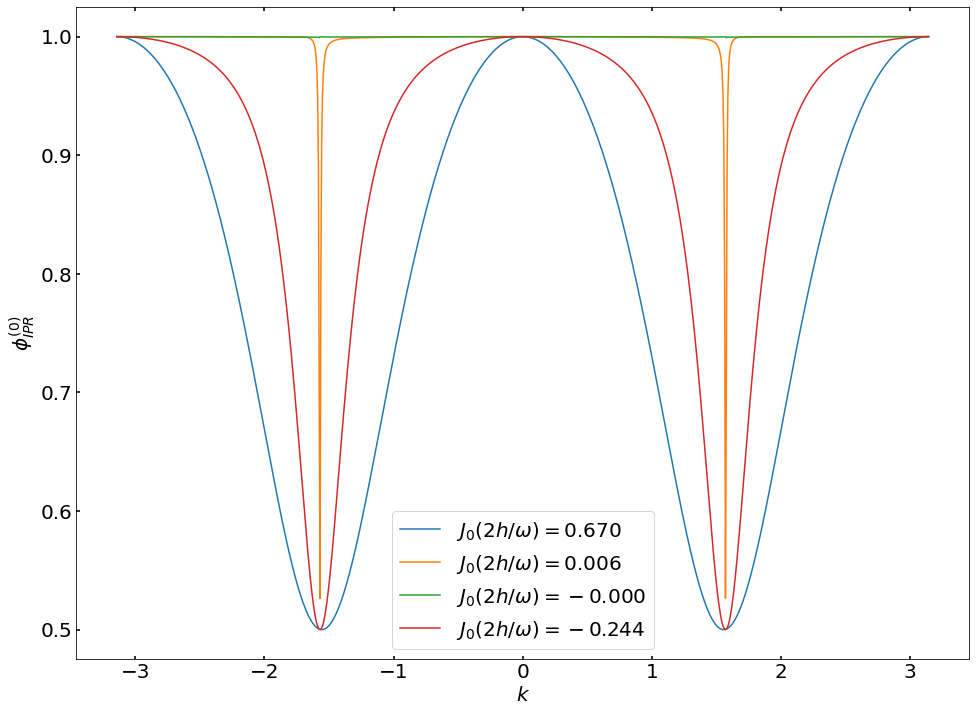

CPU times: user 30.8 s, sys: 99.8 ms, total: 30.9 s
Wall time: 30.9 s


In [2]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros
from tqdm import tqdm
import traceback

plt.rcParams.update({
    "figure.figsize": (16, 12),
    "text.usetex": False,
    "font.size": 20})

freezing_pts = jn_zeros(0, 5)
max_pts = jn_zeros(1,5)

#
# set up the calculation
#
omega = 90.0
w = omega
hfrz = omega * freezing_pts/2
hmed = 0.995 * omega * freezing_pts/2
hmax = 1.25 * omega * max_pts/2
hfin = 0.5 * omega * freezing_pts/2


delta = 1e-4
fbz = np.linspace(-np.pi+delta, np.pi-delta, 1000)

for h in np.sort([hfrz[0], hmed[0], hmax[0], hfin[0]]):
    params = {'h0':0.0, 'h':h, 'omega':omega}
    iprvals_exact = np.array([get_iprvals_exact(k, params, sort=True) for k in fbz])
    plt.plot(fbz, iprvals_exact[:,0], label=fr"$J_0(2h/\omega)={j0(2*h/w):1.3f}$")

plt.ylabel(f'$\phi^{{({{0}})}}_{{IPR}}$')
plt.xlabel(r'$k$')
plt.legend()

plt.show()

The plots above are for the **exact** dynamics of the TFIM in Fermionic representation, with the reduced IPR plotted for the entire Brillouin zone for a few drive amplitudes. The frequency is set to $\omega = 90$ and the IPR of one of the two Floquet modes are plotted at time $t=T$ for $4$ chosen amplitudes. As can be seen, the exact result is consistent with the RWA approximation. When $J_0(2h/\omega) = 0$, the RWA Hamiltonian vanishes, yielding an IPR of unity. At other points, the IPR is unity only when $k=\pm \pi$ (since $\Delta_k=0$) and $k=0$ (since $f_k = 0$ and the Hamiltonian for each $k$ $\sim \sigma_x$); other than that, there is "delocalization" due to the ensuing dynamics.

In [4]:
%%time
import numpy as np
from tqdm import tqdm
from scipy.special import jn_zeros

freezing_points = jn_zeros(0,3)

#
# set up the calculation
#
omega = 90.0
w = omega
hfrz = omega * freezing_pts/2

delta = 1e-7
fbz = np.linspace(-np.pi+delta, np.pi-delta, 100)
hvals = np.linspace(0.0, 7*omega, 200)
#include freezing points
hvals = np.sort(np.append(hvals, hfrz))

iprmat = np.empty([len(hvals), len(fbz)])
for x, h in tqdm(enumerate(hvals)):
    params = {'h0':0.0, 'h':h, 'omega':omega}
    iprvals_exact = np.array([get_iprvals_exact(k, params, sort=True) for k in fbz])
    iprmat[x,:] = iprvals_exact[:,0]

204it [02:50,  1.20it/s]

CPU times: user 2min 50s, sys: 372 ms, total: 2min 50s
Wall time: 2min 50s


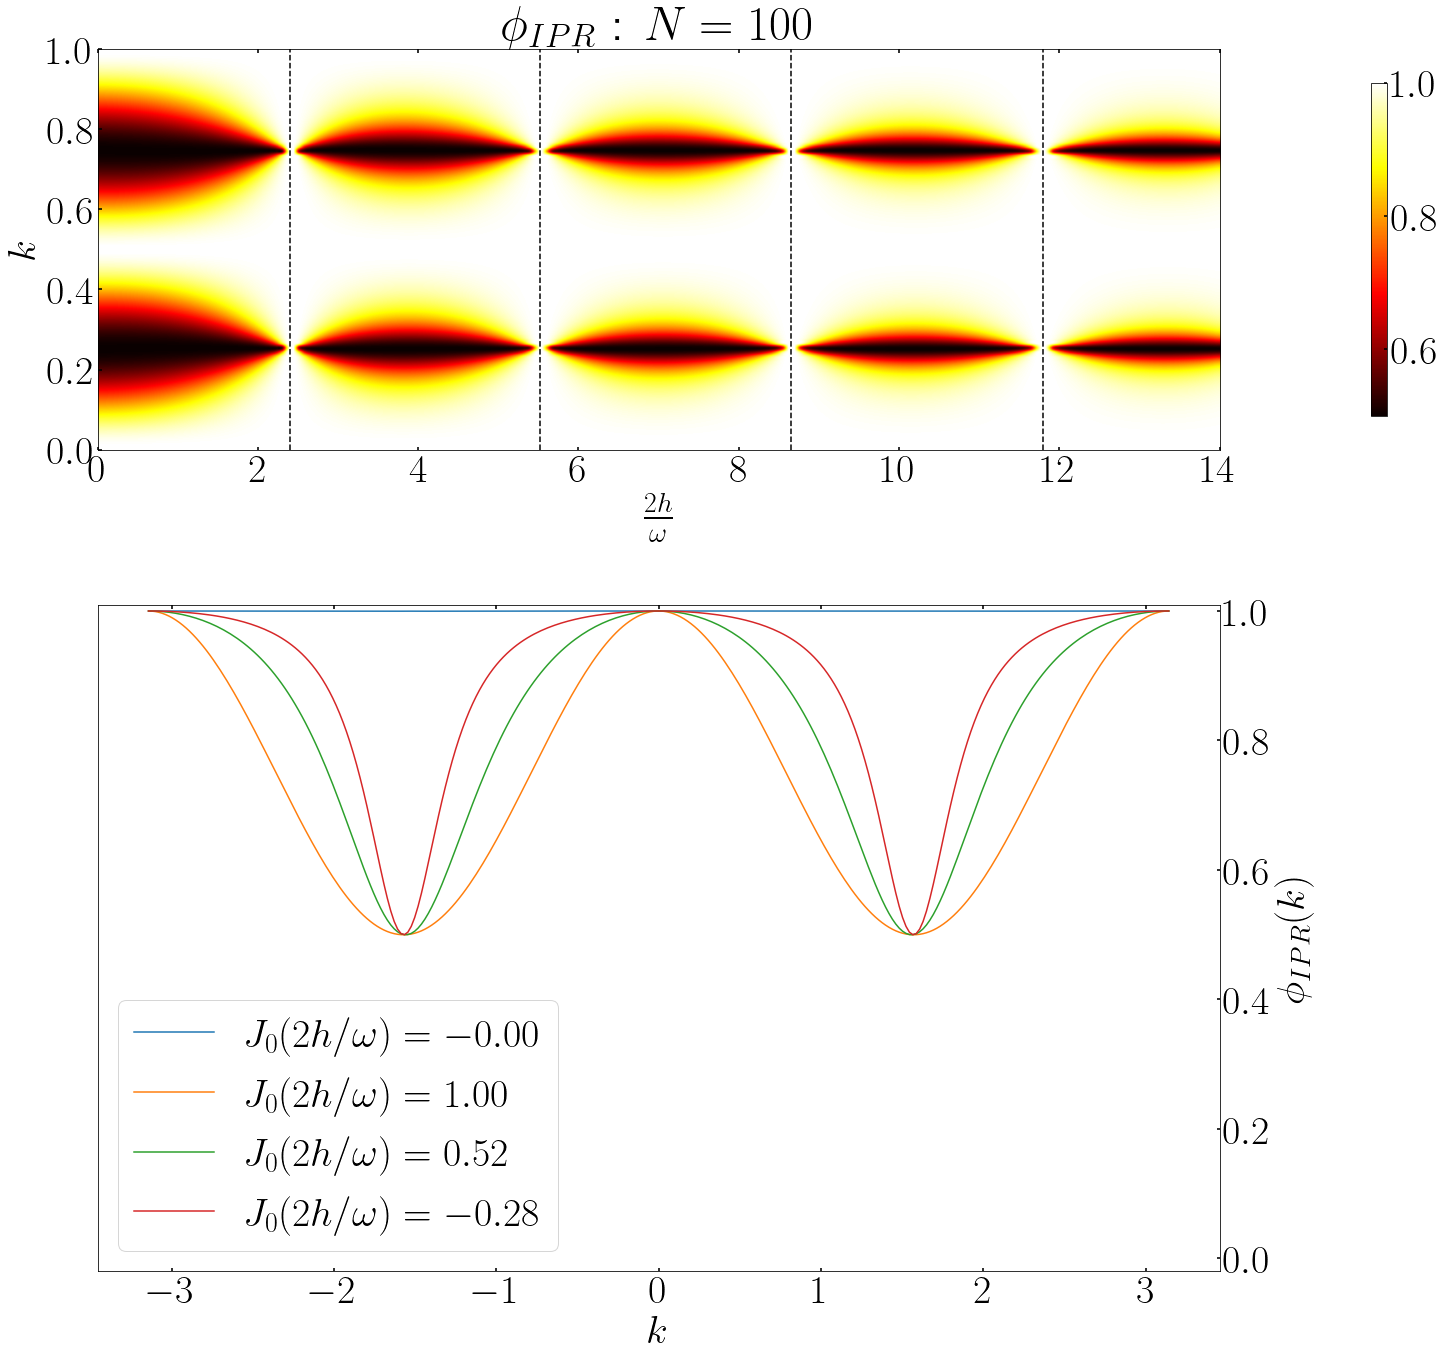

In [5]:
import matplotlib.pyplot as plt
from scipy.special import j0,jn_zeros
from scipy.interpolate import make_interp_spline

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 40,
    "font.sans-serif": ["Computer Modern"]})

freezing_pts = jn_zeros(0,4)

etas = 2 * hvals/w

fig = plt.figure(tight_layout=False, constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

ipr_ax.set_title(fr'$\phi_{{IPR}}$ : $N = {len(fbz)}$')
# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 5
ipr_ax.set_xlabel(r'$\frac{2h}{\omega}$')
ipr_ax.set_ylabel(r'$k$')


im = ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)

for pt in freezing_pts:
    ipr_ax.axvline(pt, color='black', ls='--')

fig.colorbar(im, ax=ipr_ax, orientation='vertical', shrink=0.5)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[0], atol=1e-3))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]

#Intermediate IPR
idx, = np.where(np.isclose(etas, 1.5, atol=0.09))
n2 = idx[0]

#Another IPR
idx, = np.where(np.isclose(etas, 4.8, atol=0.2))
n3 = idx[0]

for i, n in enumerate([n0,n1, n2, n3]):
    xdata = fbz
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$J_0(2h/\omega)={j0(etas[n]):1.2f}$")


crosssec_ax.set_xlabel(r"$k$")
crosssec_ax.yaxis.tick_right()
crosssec_ax.yaxis.set_label_position("right")
crosssec_ax.set_ylabel(r"$\phi_{{IPR}}(k)$")
crosssec_ax.set_ylim(-0.02, 1.01)
plt.legend()
#plt.savefig("ising_ipr.png", dpi=200)
plt.show()

## The Long-Range case: LMG model

Consider the Hamiltonian of the type
\begin{equation}
\hat{H}(t) = \hat{H}_0 + \left(h \cos{(\omega t)} + h_0\right)\; \hat{H}_1,
\end{equation}

where

\begin{eqnarray}
\hat{H}_0 &=& \sum_{ij}J_{ij}\hat{\sigma}^z_i\hat{\sigma}^z_j,\\
\hat{H}_1 &=& \sum_i\hat{\sigma}^x_i.
\end{eqnarray}
here,
\begin{eqnarray}
J_{ij} =\frac{J_\alpha}{N^{1-\alpha}}\sum_{(i<j)}^{N}\frac{1}{r_{ij}}=1,\\
\end{eqnarray}
a condition that is necessary in order to keep the energy per spin extensive (linear in $N$). Putting  $\alpha = 0$ yields the **Lipkin Meshkov Glick (LMG)** model with all-to-all interaction, yielding,
\begin{eqnarray}
J_{ij} =\frac{J_0}{N}C^N_2=\frac{J_0}{N}\frac{N(N-1)}{2}=1\\
J_0 = \frac{2}{N-1}=KacN,
\end{eqnarray}
where $KacN$ is the Kac-norm.

Here, we have $N$ spin-$1/2$ particles in a $1-$dimensional lattice, and $i,j$ are site indices. We will now attempt a numerical evaluation of
the Floquet eigenspectrum of this system.

First, define permutation operator $P_{ij} = \displaystyle\frac{1}{2}\left(1+ \vec{\sigma}_i\cdot\vec{\sigma}_j\right)$,
and note that $[P_{ij}, H]=0$. Thus, we can reduce the problem size from the full $2^N\times 2^N$ Hilbert space
to the subspace spanned by the degenerate eigenvectors of $P_{ij}$ corresponding to a single eigenvalue, say $1$.
This is isomorphic to the subspace spanned by degenerate eigenstates of the operator $S^2=|\vec{S}|^2$ with eigenvalue
$\displaystyle\frac{N}{2}\left(\frac{N}{2}+1\right)$, where

\begin{equation}
\vec{S}=S^x\hat{x}+S^y\hat{y}+S^z\hat{z}\equiv \sum_i \vec{\sigma}_i.
\end{equation}

Note that, since $[S^2, S^z]=0$, these are also eigenstates of $S^z$ in this so-called
TSS subspace. The corresponding eigenvalues are $Ns_n$, where $s_n=-\frac{1}{2}+\frac{n}{N}$ and the index
$n= 0 (1) N$ has $N+1$ values. Thus

\begin{equation}
S^z |s_n\rangle = Ns_n|s_n\rangle,
\end{equation}

and the matrix elements $(S^z)_{ij} = Ns_s\delta_{ij}$. Furthermore, defining ladder operators

\begin{equation}
S_\pm \equiv S^x \pm i S^y,
\end{equation}

and using the result

\begin{equation}
S_\pm |s_n\rangle = \sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n\pm 1}\right)}\;\;|s_{n\pm 1}\rangle,
\end{equation}

we can obtain the matrix elements $S^x = S_+ + S_-$ to be

\begin{equation*}
(S^x)_{nm} = \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n + 1}\right)}\;\;\delta_{n+1, m}  
                        +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n- 1}\right)}\;\;\delta_{n-1,m}\bigg]
\end{equation*}

Note that, considering $i<j$ the Hamiltonian can be readily written as
$H(t) = -\displaystyle\frac{2}{N-1}(S^z)^2 - (h \cos{(\omega t )} + h_0)S^x$, the matrix elements of
\begin{eqnarray}
\left(H_0\right)_{ij} &=& -\frac{2}{N-1} s^2_i \delta_{ij},\nonumber\\
\left(H_1\right)_{ij} &=& \bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i + 1}\right)}\;\;\delta_{i+1, j}  \\
    & &                     +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i- 1}\right)}\;\;\delta_{i-1,j}\bigg]
\end{eqnarray}

Note that, in the continuum limit, $N\rightarrow\infty$, we can ignore the difference between adjacent values
of $s_i$. Thus, the Hamiltonian per particle becomes $h(t)\equiv \displaystyle\frac{1}{N}H(t) = h + h_0\cos{(\omega t)}h_1$, where

\begin{eqnarray}
\left(h\right)_{ij} &\approx& - 2s^2_i \delta_{ij},\nonumber\\
H_0 &\rightarrow& -2s^2\\
\left(h_1\right)_{ij} &\approx& \sqrt{1 - 4s^2_i}\left[\delta_{i+1, j}  + \delta_{i-1,j}\right]\\
H_1 &\rightarrow& \sqrt{1 - 4s^2_i}\;\;\cos{p},
\end{eqnarray}
where we have expanded the matrix elements in a basis of $e^{ipx}$.


This Hamiltonian can be simplified in the Rotated Basis as follows. Transform the Hamiltonian to the frame given by the transformation

\begin{equation*}
\hat{U}(t)=\exp \left[i \frac{h}{\omega} \sin (\omega t) \hat{H}_{1}\right]
\end{equation*}

This yields the transformed Hamiltonian

\begin{equation*}
\tilde{H}(t)=\left(-\frac{4}{N}\right)\left[e^{i 2 \tau \hat{S}^{x}} \hat{S}^{2} e^{-i 2 \tau \hat{S}^{x}}\right],
\end{equation*}
where $\tau = \displaystyle\frac{h}{\omega}\sin{\omega t}$. We use  $e^{i \tau^{\prime} \hat{S^{x}}} \hat{S^{z}} e^{-i \tau^{\prime} \hat{S^{x}}}=\hat{S^{z}} \cos \left(\tau^{\prime}\right)+\hat{S}^{y} \sin \left(\tau^{\prime}\right)$ to evalute  $\tilde{H}(t)$ and we know that $\hat{S}^{2}=\hat{S}^{2}+\hat{S}^{2}+\hat{S}^{2}=\frac{N}{2}\left(\frac{N}{2}+1\right)$. This yields

\begin{equation*}
\tilde{H}(t)=\left(-\frac{4}{N}\right)\bigg\{\left(\hat{S}^{z}\right)^{2} \cos ^{2}(2 \tau)+\left[\frac{N}{2}\left(\frac{N}{2}+1\right)-\left(\hat{S}^{x}\right)^{2}-\left(\hat{S^{z}}\right)^{2}\right] \sin ^{2}(2 \tau)-\frac{i}{2} \hat{S^{x}} \sin (4 \tau)+\sin (4 \tau) \hat{S^{y}} \hat{S}^{z}  \bigg\}.
\end{equation*}

We now define $\eta\equiv 4h/\omega$ and use the Jacobi-Anger formulae

\begin{align*}
&\cos (\eta \sin\omega t) \equiv J_{0}(z)+2 \sum_{n=1}^{\infty} J_{2 n}(\eta) \cos (2 n \omega t) \\
&\sin (\eta \sin\omega t) \equiv 2 \sum_{n=1}^{\infty} J_{2 n-1}(\eta) \sin [(2 n-1) \omega t]
\end{align*}
to simplify the expression for $\tilde{H}(t)$. This allows us to neglect all oscillating terms to obtain the Rotated Wave Approximation

\begin{equation*}
\tilde{H}_{\mathrm{RWA}}=-\left(\frac{N}{2}+1\right)+\frac{2}{N}\left\{\left(\hat{S}^{x}\right)^{2}-J_{0}\left(\eta\right)\left[\left(\hat{S}^{z}\right)^{2}-\left(\hat{S}^{y}\right)^{2}\right]\right\}
\end{equation*}

Now, when $J_0(\eta)$ vanishes, the RWA Hamiltonian is diagonal in the transverse field representation, yielding an IPR of unity, similar to the Ising case. **However**, this does not seem to be the case for the exact simulations, as can be seen in the plots below. There, we show plots of the IPR of the Floquet mode $|\phi^n\rangle$ for all $n$ corresponding to eigenvalues of $S^x$ for a fixed eigenvalue of $S^2 = N/2\big(N/2 + 1\big)$. The IPR is thus
\begin{equation*}
\phi_{IPR}(n) = \sum_m \left\vert\langle m\vert\phi^n\rangle\right\vert^4
\end{equation*}

## References
[1] Check T. Mori's paper equation (12): Mori, T. , arXiV: 1810.01584 (2018)


Now, we look at numerical simulations for $H(t)$ via the IPR of the Floquet state in the representation of the transverse field *i.e.* the eigenstates of $S^x$.

In [3]:
from qutip import mesolve, basis, jmat

#Modded from qutip to allow parallelism
import numpy as np
import scipy.linalg as la
from numpy import angle, pi
from qutip import Qobj, propagator

def floquet_modes_mod(H, T, args=None, parallel=False, sort=False, U=None):
    """
    Calculate the initial Floquet modes Phi_alpha(0) for a driven system with
    period T.

    Returns a list of :class:`qutip.qobj` instances representing the Floquet
    modes and a list of corresponding quasienergies, sorted by increasing
    quasienergy in the interval [-pi/T, pi/T]. The optional parameter `sort`
    decides if the output is to be sorted in increasing quasienergies or not.

    Parameters
    ----------

    H : :class:`qutip.qobj`
        system Hamiltonian, time-dependent with period `T`

    args : dictionary
        dictionary with variables required to evaluate H

    T : float
        The period of the time-dependence of the hamiltonian. The default value
        'None' indicates that the 'tlist' spans a single period of the driving.

    U : :class:`qutip.qobj`
        The propagator for the time-dependent Hamiltonian with period `T`.
        If U is `None` (default), it will be calculated from the Hamiltonian
        `H` using :func:`qutip.propagator.propagator`.

    Returns
    -------

    output : list of kets, list of quasi energies

        Two lists: the Floquet modes as kets and the quasi energies.

    """
    if 'opts' in args:
        options = args['opts']
    else:
        options = Options()
        options.rhs_reuse = True
        rhs_clear() 
    
    if U is None:
        # get the unitary propagator
        U = propagator(H, T, [], args, parallel=parallel, progressbar=True, options=options)
    
    # find the eigenstates for the propagator
    evals, evecs = la.eig(U.full())

    eargs = angle(evals)

    # make sure that the phase is in the interval [-pi, pi], so that
    # the quasi energy is in the interval [-pi/T, pi/T] where T is the
    # period of the driving.  eargs += (eargs <= -2*pi) * (2*pi) +
    # (eargs > 0) * (-2*pi)
    eargs += (eargs <= -pi) * (2 * pi) + (eargs > pi) * (-2 * pi)
    e_quasi = -eargs / T

    # sort by the quasi energy
    if sort:
        order = np.argsort(-e_quasi)
    else:
        order = list(range(len(evals)))

    # prepare a list of kets for the floquet states
    new_dims = [U.dims[0], [1] * len(U.dims[0])]
    new_shape = [U.shape[0], 1]
    kets_order = [Qobj(np.matrix(evecs[:, o]).T,
                       dims=new_dims, shape=new_shape) for o in order]

    return kets_order, e_quasi[order]


def drive(t, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    return h * np.cos(w*t) + h0

def get_hamiltonians(N):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N                                      # kacNorm
    H0 = kn * sz **2 
    H1 = 2 * sx
    return H0,H1

def floq_evolv(args):
    N = args['N']
    T = 2 * np.pi/args['omega']
    opts = args['opts']
    H0, H1 = get_hamiltonians(N)
    H = [H0,[H1,drive]]
    f_states, _ = floquet_modes_mod(H, T, args=args)
    return f_states


print("Definitions complete!")

Definitions complete!


In [137]:
%%time
from qutip import Qobj, jmat, Options
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros

delta = 0.0
freezing_pts = jn_zeros(0,3)+delta
####################################################################################################
#
#                                     Exact Dynamics
#
####################################################################################################

N = 30
h0 = 0.0
omega = 90
nprocs = 13

w = omega

hsteps = 70
#h1 = (1/4) * omega * 0.01
h1 = 0
h2 = (1/4) * omega * 16.0 

hroots = freezing_pts * omega/4

hs = np.linspace(h1, h2, hsteps)

hs = np.sort(np.append(hs, hroots))

p = Pool(processes = nprocs)          
print("running for N = ", N, "with",nprocs,"processors")  

#Qutip Solver Options
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)
params = [{'h0':0, 'h':h, 'omega':omega, 'N':N, 'opts':opts} for h in hs]
f_stateslist = p.map(floq_evolv,tqdm(params, position=0, leave=True))


iprmat = np.zeros((len(hs),2*N+1))

sx = jmat(N,"x")
en, st = sx.eigenstates()

print("\n Done. Now calculating PR ...")
for xx,h in enumerate(hs):
    f_states = f_stateslist[xx]
    iprmat[xx,:] = [np.sum([np.abs(state.overlap(sx_ev))**4 for sx_ev in st]) for state in f_states]
print("Exact simulation complete!")


running for N =  30 with 13 processors


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<00:00, 22870.05it/s]



 Done. Now calculating PR ...
Exact simulation complete!
CPU times: user 5.93 s, sys: 858 ms, total: 6.79 s
Wall time: 1min 7s


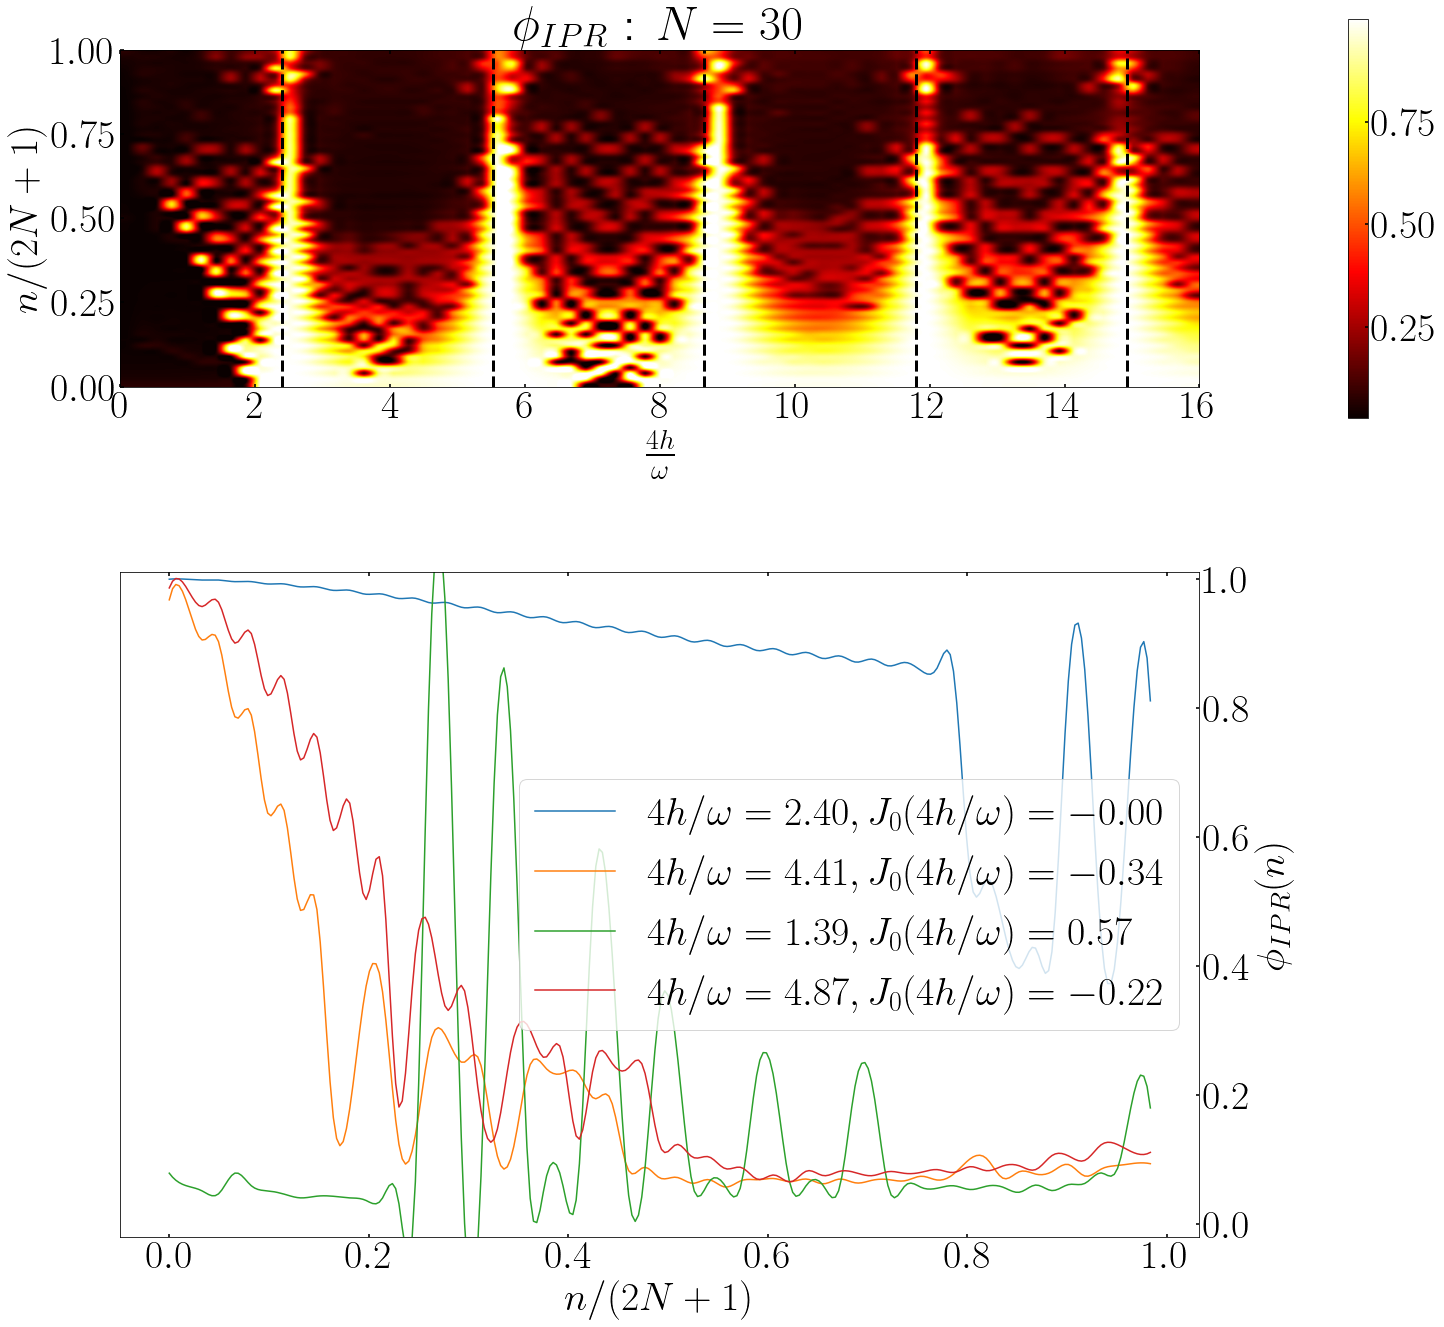

In [139]:
import matplotlib.pyplot as plt
from scipy.special import j0
from scipy.interpolate import make_interp_spline

from scipy.signal import savgol_filter

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 40,
    "font.sans-serif": ["Computer Modern"]})


from scipy.special import jn_zeros
freezing_pts = jn_zeros(0,5) + delta

etas = 4 * hs/w

fig = plt.figure(constrained_layout=True)

ipr_ax, crosssec_ax = fig.subplots(2,1)

ipr_ax.set_title(fr'$\phi_{{IPR}}$ : $N = {N}$')
# find minimum of minima & maximum of maxima
minmin = np.min(np.min(iprmat))
maxmax = np.max(np.max(iprmat))
asp = 5
ipr_ax.set_xlabel(r'$\frac{4h}{\omega}$')
ipr_ax.set_ylabel(r'$n/(2N+1)$')

for pt in freezing_pts:
    ipr_ax.axvline(x=pt, color='black', linestyle="--",linewidth=3.0)

im = ipr_ax.imshow(iprmat.T, aspect=asp, interpolation='spline16',\
                cmap='hot', origin='lower',extent = [etas[0] , etas[-1], 0 , 1], vmax=maxmax, vmin=minmin)

fig.colorbar(im, ax=ipr_ax, orientation='vertical', shrink=0.6)


#Freezing point
idx, = np.where(np.isclose(etas, freezing_pts[0], atol=0.03))
n0 = idx[0]

#High IPR
idx = np.where(iprmat[20:] == iprmat[20:].min())
n1 = idx[0][0]+20

#Intermediate IPR
idx, = np.where(np.isclose(etas, 1.5, atol=0.15))
n2 = idx[0]

#Another IPR
idx, = np.where(np.isclose(etas, 4.8, atol=0.15))
n3 = idx[0]

for i, n in enumerate([n0,n1, n2, n3]):
    xdata = np.arange(2*N+1)/(2*N+1)
    ydata =  iprmat[n]
    xnew = np.linspace(xdata.min(), xdata.max(), 300)
    gfg = make_interp_spline(xdata, ydata, k=3)
    crosssec_ax.plot(xnew, gfg(xnew), label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")
    #crosssec_ax.plot(xdata, ydata, label=fr"$4h/\omega={etas[n]:1.2f}, J_0(4h/\omega)={j0(etas[n]):1.2f}$")


crosssec_ax.set_xlabel(r"$n/(2N+1)$")
crosssec_ax.yaxis.tick_right()
crosssec_ax.yaxis.set_label_position("right")
crosssec_ax.set_ylabel(r"$\phi_{{IPR}}(n)$")
crosssec_ax.set_ylim(-0.02, 1.01)
plt.legend()
plt.show()

### Nature of the Floquet Hamiltonian

Here, we're looking at hinton plots of the matrix elements (in the $S^x$ representation) Floquet Hamiltonian $H_F$

CPU times: user 37 s, sys: 3.59 s, total: 40.6 s
Wall time: 32.3 s


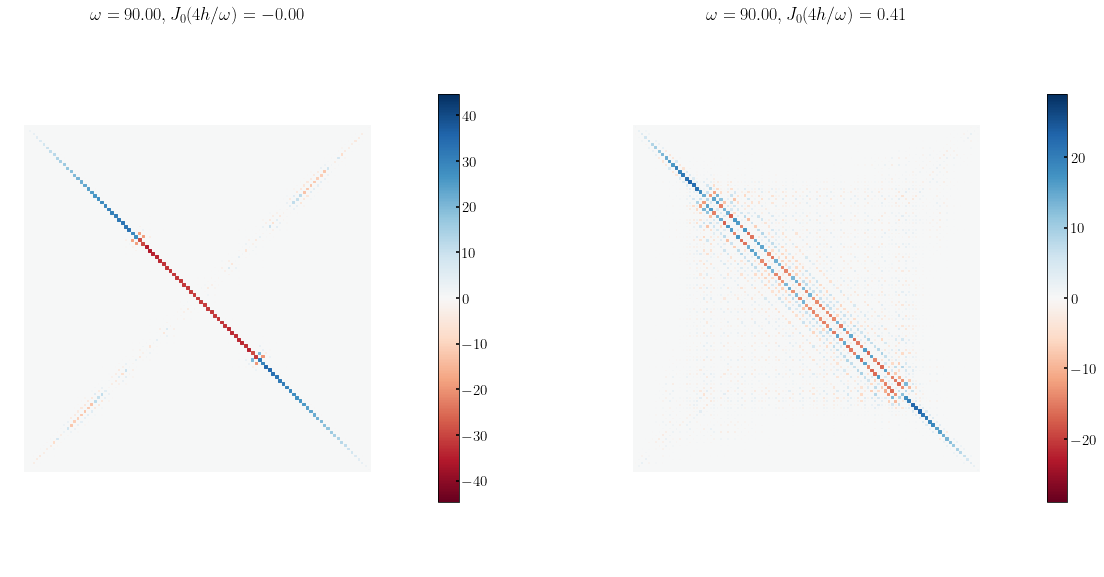

In [107]:
%%time
from qutip import Qobj, hinton, Options, jmat, matrix_histogram
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros, j0
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (20, 10),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 15,
    "font.sans-serif": ["Computer Modern"]})


freezing_pts = jn_zeros(0,3)
####################################################################################################
#
#                                     Exact Dynamics
#
####################################################################################################


N = 50
h0 = 0.0
# no anti-diagonal in frozen HF for w =80
# anti-diagonal appears in frozen HF for w =82

omega = 90
nprocs = 13

w = omega
T = 2.0 * np.pi/w

h_frz = freezing_pts[0] * omega/4
h_nfrz = 0.7 * h_frz

H0, H1 = get_hamiltonians(N)
H = [H0,[H1,drive]]
fig, axs = plt.subplots(1,2)
opts = Options(nsteps=1e5, num_cpus=13, openmp_threads=13)

params_frz = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w, 'N':N, 'opts':opts}
sx = jmat(N,"x")
en, st = sx.eigenstates()

for i,p in enumerate([params_frz, params_nfrz]):
    h, w = p['h'], p['omega']
    f_modes, f_energies = floquet_modes_mod(H, T, args=p, parallel=True)
    HF = 0.
    for j, Omega in enumerate(f_energies):
        HF += Omega * f_modes[j].proj()
    
    HF = HF.transform(st)
    fig, ax = hinton(HF.tidyup(atol=1e-7), ax=axs[i], xlabels=False, ylabels=False)
    ax.set_title(r'$\omega = {:1.2f}, J_0(4h/\omega)={:1.2f} $'.format(w, j0(4*h/w)))
    

### Conclusion
$S^x$ is mostly conserved and $H_F$ is **mostly** diagonal in the $S^x$ representation at freezing, the Floquet states have edge dips in their IPR's away from unity, possibly due to higher order effects in the RWA expansion...

# Classical Lipkin Dynamics

In the continuum limit, the Lipkin system can be described by the $p,q$ Hamiltonian:
\begin{equation*}
H = -2 q^2 - h(t)\;\sqrt{1-4q^2}\;\cos{p},
\end{equation*}
which yields the Hamiltonian dynamical system 
\begin{align*}
\frac{dq}{dt} &= h(t)\;\sqrt{1-4q^2}\;\sin{p}\\
\frac{dp}{dt} &= 4q\bigg[1-\frac{h(t)\cos{p}}{\sqrt{1-4q^2}}\bigg]
\end{align*}
Below are the Poincare sections (strobed at integer multiples of $T=2\pi/\omega$) of the ensuing dynamics for $h(t)=h\cos{\omega t}$ for two cases, one for which $J_0(4h/\omega)=0$ and one at lower value of $h$. These are compaared with the Husimi Q-functions of the Floquet States obtained as above. The quantum phase space is described by the *Spectral Average* of the Husimi functions of all the Floquet modes $|\phi^n\rangle$ for the chosen value of $S^2$, *i.e.* for a coherent state $|q, p\rangle$, we plot
\begin{equation*}
H(q,p)\equiv \frac{1}{\big(2N+1\big)\pi}\sum_n \langle q,p\vert \phi^n\rangle\langle\phi^n\vert q,p\rangle
\end{equation*}

These are shown for two cases, small $\omega$, where the classical plots are chaos dominated, and large $\omega$, where they are regular.

In [20]:
# Lipkin Model Cross-Section
import numpy as np
from scipy.integrate import odeint, odepack
import matplotlib.pyplot as plt
from multiprocessing import Pool
import time
from scipy.special import j0, jn_zeros
import warnings

warnings.filterwarnings("ignore")
from qutip import Options
from qutip.wigner import qfunc

# Maximum number of strobes
nmax = 1000
# Number of Processors
nprocs = 11

def lmg(z, t, h0, h, w):
    q, p = z
    drive = h0 + h * np.cos(w * t)
    sterm = np.sqrt(1.0 - 4.0 * q * q)
    qdot = drive * sterm * np.sin(p)
    pdot = 4.0 * q * (1.0 - (drive * np.cos(p)/sterm) )
    return [qdot, pdot]

def poincare_sec(x0, p0, nmax, args):
    h0, h, omega = args
    T = 2.0 * np.pi/omega
    t = T * np.arange(nmax)
    init = [x0,p0]
    points = odeint(lmg, init, t, args=args)
    points[:,1] = points[:,1] % (2.0 * np.pi)
    return points

plt.rcParams.update({
    "figure.figsize": (20, 20),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.sans-serif": ["Computer Modern"]})

# Initial Conditions for classical poincare
n_ic = 15
init_x = np.linspace(-0.45, 0.45, n_ic)
near_zero = np.linspace(-0.01, 0.01, 10)
init_x = np.sort(np.append(init_x, near_zero))
init_p = np.linspace(0.0, 2.0 * np.pi, n_ic)
init_p = np.sort(np.append(init_p, [0.1, np.pi + 0.2]))
xv, pv = np.meshgrid(init_x, init_p, indexing='ij')

# Initial Conditions for quantum husimi
# Choose a size
N = 150
#Qutip Solver Options
opts = Options(nsteps=1e5, num_cpus=13, openmp_threads=13)
n_Q = 100
Q_qvals = np.linspace(-0.5, 0.5, n_Q)
Q_pvals = np.linspace(0.0, 2.0 * np.pi, n_Q)
Q_pvals = np.sort(np.append(Q_pvals, [0.1, np.pi + 0.2]))

Poincare section dynamics for h = 1.503015973559858 w = 2.5 with 11 processes ...
Done in 144.00769186019897 secs
Husimi plots for h = 1.503015973559858 w = 2.5 with 11 processes ...
Done in 20.00970721244812 secs
Poincare section dynamics for h = 54.10857504815489 w = 90.0 with 11 processes ...
Done in 147.22787857055664 secs
Husimi plots for h = 54.10857504815489 w = 90.0 with 11 processes ...
Done in 13.76294755935669 secs


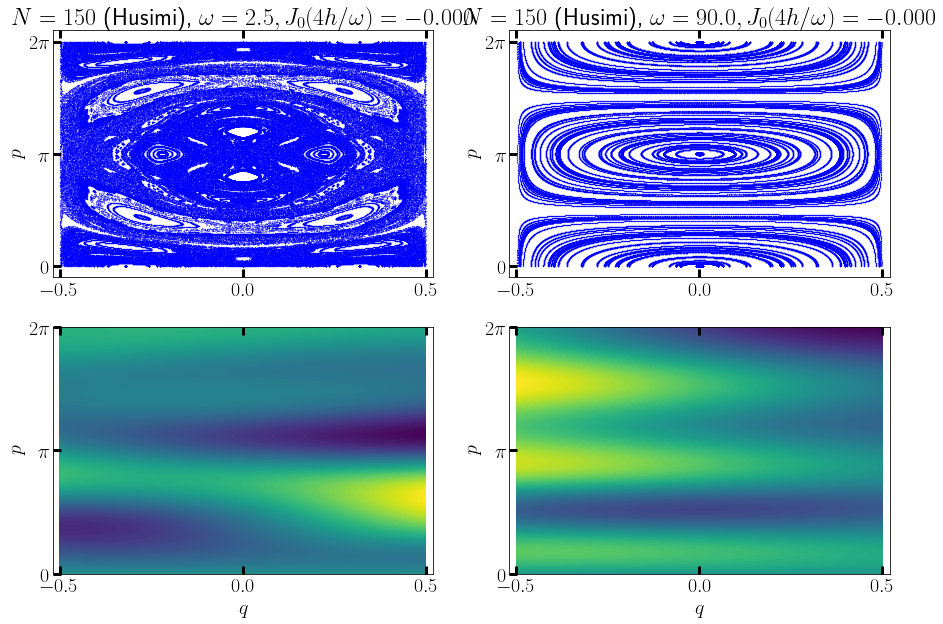

In [48]:
if __name__ == '__main__':
    # Drive parameters
    h0 = 0.0
    omegas = [2.5, 90.0]
    eta = jn_zeros(0,1)
    eta = eta[0]
    
    n_omegas = len(omegas)
    fig, axs = plt.subplots(2, n_omegas, figsize=(15, 10))

    for i, w in enumerate(omegas):
        h_frz = eta * w/4
        print(f"Poincare section dynamics for h = {h_frz} w = {w} with {nprocs} processes ...")   
        start = time.time()
        with Pool(processes = nprocs) as p:
            poincare_data = p.starmap(poincare_sec,[(x0, p0, nmax, (h0, h_frz, w)) for x0, p0 in zip(xv.flatten(), pv.flatten())])
        
        poincare_data = np.vstack(poincare_data)
        qvals = poincare_data[:,0]
        pvals = poincare_data[:,1]
        elapsed =  (time.time() - start)
        print(f"Done in {elapsed} secs")
        
        axs[0,i].set_title(r'$N={:d}$ (Husimi), $\omega = {:2.1f}, J_0(4 h/\omega) = {:1.3f}$'.format(N,w,j0(4*h_frz/w)))
        axs[0,i].scatter(qvals, pvals , color='blue', marker='.', s=.1)  
        
        #Now for the quantum case
        print(f"Husimi plots for h = {h_frz} w = {w} with {nprocs} processes ...")  
        start = time.time()
        params = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts} 
        H0, H1 = get_hamiltonians(N)
        H = [H0,[H1,drive]]
        T = 2 * np.pi/w
        evecs_f, _ = floquet_modes_mod(H, T, args=params)
        Q_fstate = 0
        for fstate in evecs_f:
            Q_fstate += qfunc(fstate, Q_qvals, Q_pvals)
        
        elapsed =  (time.time() - start)
        print(f"Done in {elapsed} secs")
        axs[1,i].contourf(Q_qvals, Q_pvals, Q_fstate/(2*N+1), 100)
        axs[1,i].set_xlabel(r'$q$')
    
    
    #Formatting
    x_tick = np.array([-0.5, 0.0, 0.5])
    unit   = 1.0
    p_tick = np.arange(0.0, 2.0 + unit, unit)
    p_label = [r"$0$", r"$\pi$", r"$2\pi$"]
    
    for ax in axs.flatten():
        ax.set_xticks(x_tick)
        ax.set_xlim(-0.52, 0.52)
        ax.set_yticks(p_tick*np.pi, p_label)
        ax.set_ylabel(r"$p$")
        ax.tick_params(direction='in', length=8, width=3)
    
    #plt.savefig("lmg_poincare01.svg")
    plt.show()

## Conservation of $S^x$ at freezing, classical and quantum

Here, we compare the quantum evolution of $\langle S^x\rangle$ (both in and out of freezing) with the evolution of $s_x = \sqrt{1-4q^2}\cos{p}$ in the classical case. For the moment, we're choosing random initial conditions for both cases. Below are plots of the relative evolution $\big(\langle S^x(t)\rangle-\langle S^x(0)\rangle\big)/\langle S^x(0)\rangle$ of the quantum case, contrasted with the relative evolution of the classical $\big(s_x(t) -s_x(0)\big)/s_x(0)$, with the drive frequency $\omega=90$ and the amplitude $h$ adjusted both for the freezing case ($J_0(4h/\omega)=0$, lowest root) and out of freezing, with $J_0(4h/\omega)\neq 0$.

CPU times: user 612 ms, sys: 281 ms, total: 893 ms
Wall time: 3min 26s


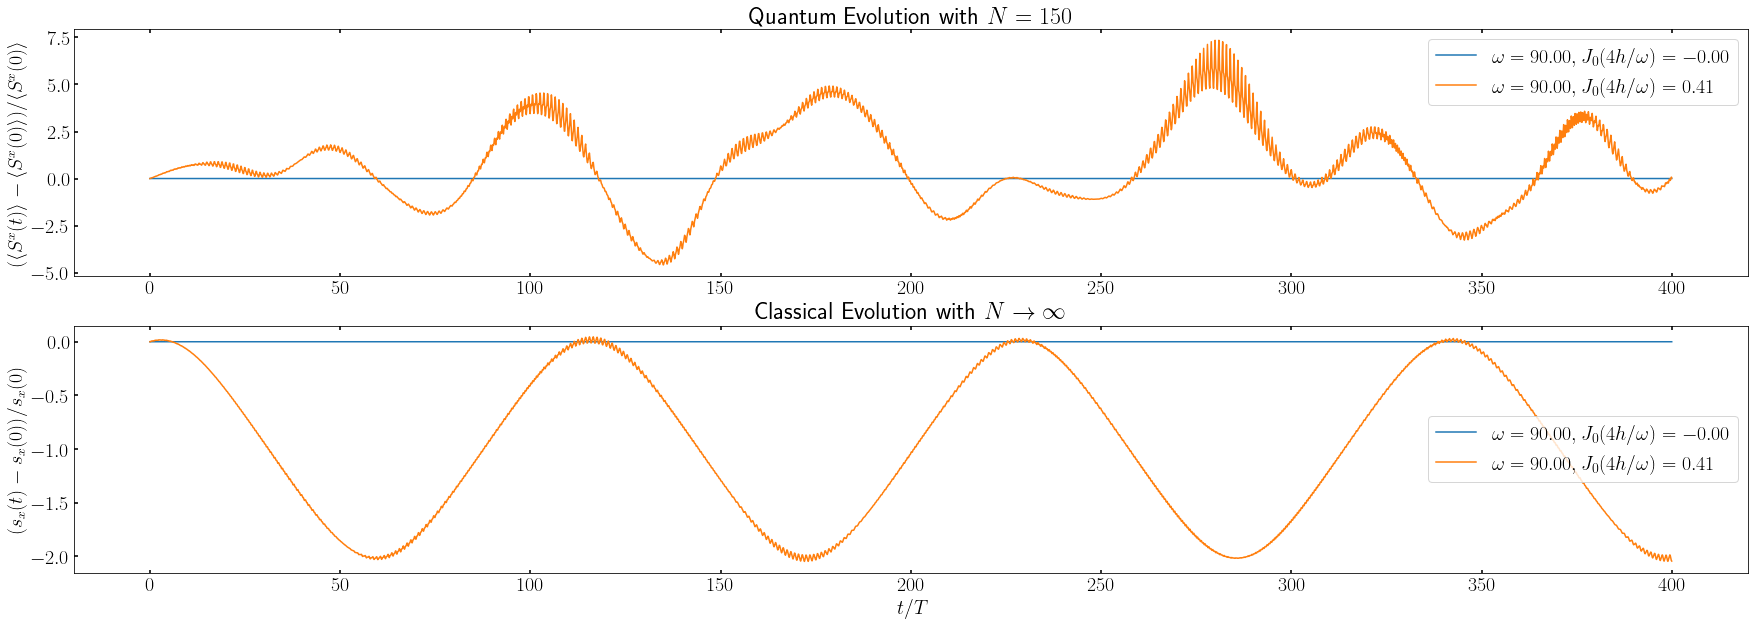

In [25]:
%%time
from qutip import Options, mesolve, rand_ket, parfor
import numpy as np
from scipy.special import jn_zeros
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (12, 12),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.sans-serif": ["Computer Modern"]})

N = 150
h0 = 0.0
omega = 90
nprocs = 13

fig, (ax_q, ax_c) = plt.subplots(2, 1, figsize=(30, 10))
ax_q.set_title(r"Quantum Evolution with $N={:d}$".format(N))
ax_c.set_title(r"Classical Evolution with $N\rightarrow\infty$")

freezing_pts = jn_zeros(0,3)
psi0 = rand_ket(2*N+1)
qinit = np.random.uniform(-0.5, 0.5)
pinit = np.random.uniform(0.0, 2 * np.pi)
nt = 400
times = np.linspace(0.0, nt*T, nt*10)


def classical_evolve(args):
    h, w = args['h'], args['omega']
    T = 2.0 * np.pi/w
    init = [qinit,pinit]
    p = (0.0, h, w)
    points = odeint(lmg, init, times, args=p)
    points[:,1] = points[:,1] % (2.0 * np.pi)
    qvals, pvals = points[:,0], points[:,1]
    return times/T, np.sqrt(1-4*qvals*qvals) * np.cos(pvals)

def quantum_evolve(args):
    h, w = args['h'], args['omega']
    result = mesolve(H, psi0, times,args=args, e_ops=jmat(N,"x")/N)
    T = 2 * np.pi/w
    return times/T, result.expect[0]

w = omega
T = 2.0 * np.pi/w

h_frz = freezing_pts[0] * w/4
h_nfrz = 0.7 * h_frz

H0, H1 = get_hamiltonians(N)
H = [H0,[H1,drive]]

#Qutip Solver Options
opts = Options(nsteps=1e7, num_cpus=2, openmp_threads=1)
params_frz = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w, 'N':N, 'opts':opts}

params_arr = [params_frz, params_nfrz]

times_arr, sxq_arr = parfor(quantum_evolve, params_arr)
times_arr, sxc_arr = parfor(classical_evolve, params_arr)

for j, p in enumerate(params_arr):
    h, w = p['h'], p['omega']
    ax_q.plot(times/T, (sxq_arr[j]-sxq_arr[0])/sxq_arr[0], label=r'$\omega = {:2.2f}, J_0(4h/\omega)={:1.2f}$'.format(w, j0(4*h/w)))
    ax_c.plot(times/T, (sxc_arr[j]-sxc_arr[0])/sxc_arr[0], label=r'$\omega = {:2.2f}, J_0(4h/\omega)={:1.2f}$'.format(w, j0(4*h/w)))
    
ax_q.set_ylabel(r'$\big(\langle S^x(t)\rangle - \langle S^x(0)\rangle\big)/\langle S^x(0)\rangle$')
ax_c.set_ylabel(r'$\big(s_x(t) - s_x(0)\big)/s_x(0)$')

ax_c.set_xlabel(r'$t/T$')
#ax_q.set_ylim(-50,50)
#ax_c.set_ylim(-5,5)

ax_q.legend()
ax_c.legend()

# RWA to higher orders

The full Hamiltonian for the LMG model in the rotated basis is

\begin{equation}
\tilde{H}(t) = -\frac{4}{N}\Bigg[\frac{N}{2}\big(\frac{N}{2}+1\big) - \big(S^x\big)^2\Bigg]  -\frac{4}{N}\Big[\big(S^x\big)^2 - \big(S^y\big)^2\Big] \Bigg[\frac12 J_0(\eta) + \sum^\infty_{n=1}J_{2n}(\eta)\cos{\big(2n\omega t\big)}\Bigg] -\frac{4}{N} \big\{S^y, S^z \big\} \sum^\infty_{n=1}J_{2n-1}(\eta)\sin{\Big[\big(2n-1\big)\omega t\Big]}
\end{equation}

We can numerically obtain successive approximations for $H_F$ by truncating this series to higher orders in order to probe for the emergene of the anti-diagonal terms in $H_F$ in the $S^x$ representation.

CPU times: user 34.9 s, sys: 1.65 s, total: 36.5 s
Wall time: 27.6 s


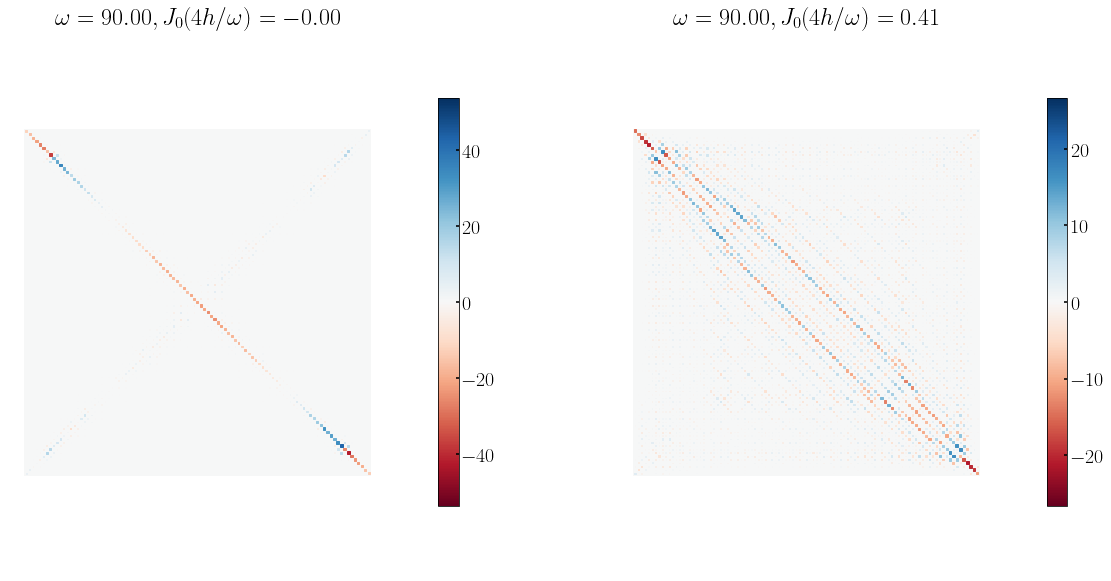

In [19]:
%%time
from qutip import Qobj, hinton, Options, jmat, matrix_histogram
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.special import j0, jn,jn_zeros
from numpy import angle, pi
from qutip import Qobj

def drive2(t, args):
    n = 1
    w, h, h0 = args['omega'], args['h'], args['h0']
    return jn(2*n-1,4*h/w) * np.sin((2*n-1)*w*t)

def get_hamiltonians_RWA(N, args):
    w = args['omega']
    h = args['h']
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N   
    H0 = -kn * (N/2 *(N/2+1) - sx*sx) 
    H0 += (-2* kn) * (sz*sz - sy*sy) * j0(4*h/w)
    H1 = -2 * kn * (sy*sz + sz*sy)
    return H0,H1

plt.rcParams.update({
    "figure.figsize": (20, 10),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "font.sans-serif": ["Computer Modern"]})


freezing_pts = jn_zeros(0,3)

N = 50
h0 = 0.0
omega = 90
w = omega
T = 2.0 * np.pi/w
h_frz = freezing_pts[0] * omega/4
h_nfrz = 0.7 * h_frz

nprocs = 12
fig, axs = plt.subplots(1,2)
opts = Options(nsteps=1e5, num_cpus=nprocs, openmp_threads=1)

params_frz = {'h0':0, 'h':h_frz, 'omega':w, 'N':N, 'opts':opts}
params_nfrz = {'h0':0, 'h':h_nfrz, 'omega':w, 'N':N, 'opts':opts}
sx = jmat(N,"x")
en, st = sx.eigenstates()

for i,p in enumerate([params_frz, params_nfrz]):
    H0,H1 = get_hamiltonians_RWA(N, p)
    H = [H0,[H1,drive2]]
    h, w = p['h'], p['omega']
    f_modes, f_energies = floquet_modes_mod(H, T, args=p, parallel=True)
    HF = 0.
    for j, Omega in enumerate(f_energies):
        HF += Omega * f_modes[j].proj()
    
    HF = HF.transform(st)
    fig, ax = hinton(HF.tidyup(atol=1e-7), ax=axs[i], xlabels=False, ylabels=False)
    ax.set_title(r'$\omega = {:1.2f}, J_0(4h/\omega)={:1.2f} $'.format(w, j0(4*h/w)))

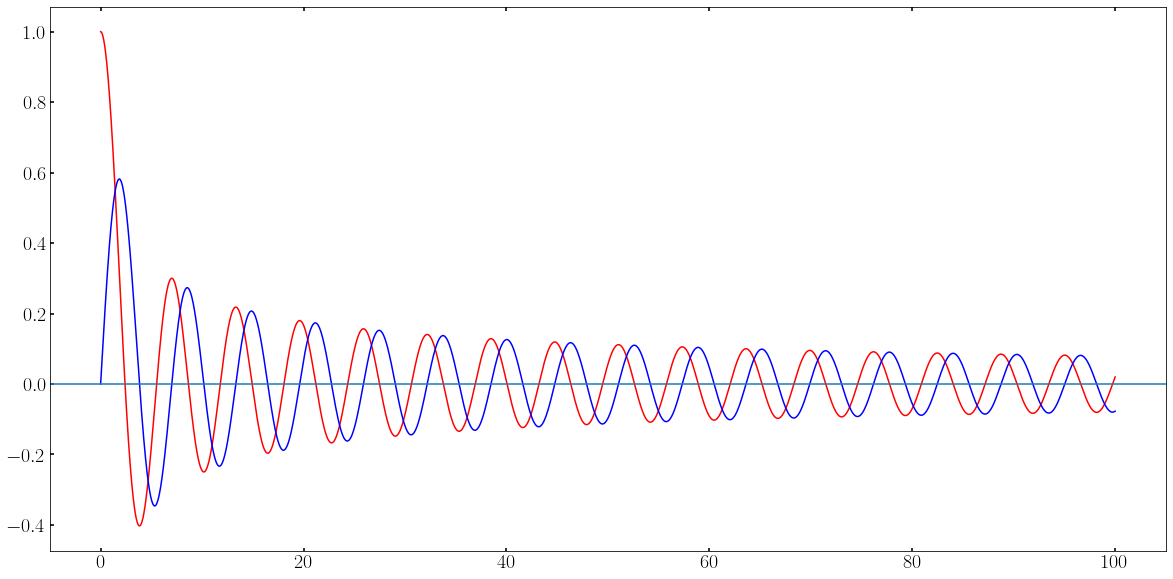

In [13]:
import matplotlib.pyplot as plt
from scipy.special import j0, j1

x = np.linspace(0.0, 100.0, 20000)
plt.plot(x, j0(x),'r-')
plt.plot(x, j1(x),'b-')
plt.axhline(0.0)
plt.show()

In [14]:
jn_zeros(0, 3)

array([2.40482556, 5.52007811, 8.65372791])

In [15]:
jn_zeros(1, 3)

array([ 3.83170597,  7.01558667, 10.17346814])

In [16]:
jn_zeros(2, 3)

array([ 5.1356223 ,  8.41724414, 11.61984117])